In [1]:
import scanpy as sc
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
from scipy.spatial import KDTree
import numpy as np
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# make font changeable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2


In [2]:
adata = sc.read_h5ad('../GBM_Linnarsson_EEL.h5ad')
#adata_tumor_sc.X = adata_tumor_sc.layers['smooth']

# All Samples

In [17]:
palette = {
    'AC-like 1':'#2ecc71',#inchworm B4FF9F
    'AC-like 2':'#2ecc71',#inchworm B4FF9F
    'AC-like 3':'#2ecc71',#inchworm B4FF9F
    'AC-like 4':'#2ecc71',#inchworm B4FF9F
    'AC-like 5':'#2ecc71',#inchworm B4FF9F
    'AC-like 6':'#2ecc71',#inchworm B4FF9F
    'AC-like 7':'#2ecc71',#inchworm B4FF9F
    'AC-like 8':'#2ecc71',#inchworm B4FF9F

    'preOPC-like 1':'#7befb2',#'#c2f970'

    'GW-like Endo.Ass.':'#e76d89',# Deep cerise
    'GW-like Periphery1':'#e76d89',# Deep cerise
    'GW-like Periphery2':'#e76d89',# Deep cerise
    'GW-like Periphery3':'#e76d89',# Deep cerise
    'GW-like HYPR1':'#e76d89',# Deep cerise
    'GW-like HYPR2':'#e76d89',# Deep cerise
    'GW-like nIPC':'#e76d89',# Deep cerise
    'GW-like OPC':'#e76d89',# Deep cerise
    
    #'nIPC-like 1':'#FFF192',
    #'nIPC-like 2':'#FFF192',
    #'nIPC-like 3':'#FFF192',
    
    'RG-like':'#ff9470',
    'nIPC-RG-like':'#ff9470',
    
    'OPC-like 1':'#89c4f4', #bright turquoise
    'OPC-like 2':'#89c4f4', #bright turquoise
    
    'TAM-BDM 1':'#e3ba8f', #wood
    'TAM-BDM 2':'#e3ba8f',
    'TAM-BDM 3':'#e3ba8f',
    'TAM-BDM 4':'#e3ba8f', #wood

    'TAM-MG':'#a6915c',#red orange
    'Mono 1': '#f4ede4',
    'Mono 2': '#f4ede4',
    
    'Oligodendrocyte':'#392e4a',
    'Astrocyte':'#038aff',
    
    #'Endothelial':'#d5b8ff', #mauve
    #'Mural cell': '#8c14fc',  #electric indigo
    #'Mural': '#8c14fc',  #electric indigo
    
    'Endothelial':'#d5b8ff', #mauve
    'Mural cell': '#8c14fc',  #electric indigo

    #'FB-like 1': '#9f5afd', #fff9de
    'FB-like 2': '#9f5afd', #fff9de
    'FB-like 3': '#9f5afd', #fff9de

}

In [4]:
rename_dic = {
    'GW-like 5':'GW-like Endo.Ass.',
    'GW-like 2':'GW-like Periphery1',
    'GW-like 3':'GW-like Periphery2',
    'GW-like 1':'GW-like Periphery3',
    
    'GW-like 6':'GW-like HYPR1',
    'GW-like 8':'GW-like HYPR2',
    'GW-like 7':'GW-like OPC',
    'GW-like 4':'GW-like nIPC',
    
    'nIPC-RG-like':'RG-like',
    
 
}

adata.obs['m-states3'] = pd.Categorical([rename_dic[m] if m in rename_dic else m for m in adata.obs['m-states2']])
adata.obs['m-states3'] = ['Endothelial' if ms.count('Endothelial') else ms for ms in adata.obs['m-states3']]
adata.obs['m-states3'] = ['Oligodendrocyte' if ms.count('Oligodendrocyte') else ms for ms in adata.obs['m-states3']]
adata.obs['m-states3'] = pd.Categorical(['Mural cell' if ms.count('Mural') else ms for ms in adata.obs['m-states3']])

rename_dic = {
    'GW-like 5':'GW-like Endo.Ass.',
    'GW-like 2':'GW-like Periphery1',
    'GW-like 3':'GW-like Periphery2',
    'GW-like 1':'GW-like Periphery3',
    
    'GW-like 6':'GW-like HYPR1',
    'GW-like 8':'GW-like HYPR2',
    'GW-like 7':'GW-like OPC',
    'GW-like 4':'GW-like nIPC',
    
    'nIPC-RG-like':'RG-like',
    
 
}

adata.obs['m-states3'] = pd.Categorical([rename_dic[m] if m in rename_dic else m for m in adata.obs['m-states2']])
adata.obs['m-states3'] = ['Endothelial' if ms.count('Endothelial') else ms for ms in adata.obs['m-states3']]
adata.obs['m-states3'] = ['Oligodendrocyte' if ms.count('Oligodendrocyte') else ms for ms in adata.obs['m-states3']]
adata.obs['m-states3'] = pd.Categorical(['Mural cell' if ms.count('Mural') else ms for ms in adata.obs['m-states3']])# SL035B

In [5]:
grey = adata.obs['m-states3'].cat.categories[adata.obs['m-states3'].cat.categories.isin(palette.keys())].tolist()

In [6]:
adata.obs['m-states3'].cat.categories

Index(['AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5',
       'AC-like 6', 'AC-like 7', 'Astrocyte', 'DC', 'Endothelial',
       'Erythrocyte 1', 'FB-like 1', 'FB-like 2', 'FB-like 3', 'GBL-like 1',
       'GBL-like 2', 'GW-like Endo.Ass.', 'GW-like HYPR1', 'GW-like HYPR2',
       'GW-like OPC', 'GW-like Periphery1', 'GW-like Periphery2',
       'GW-like Periphery3', 'GW-like nIPC', 'Mono 1', 'Mono 2', 'Mural cell',
       'OPC-like 1', 'OPC-like 2', 'Oligodendrocyte', 'RG-like', 'TAM-BDM 1',
       'TAM-BDM 2', 'TAM-BDM 3', 'TAM-BDM 4', 'TAM-MG', 'nIPC-like 1',
       'nIPC-like 2', 'nIPC-like 3', 'preOPC-like 1', 'unknown 1',
       'unknown2 1'],
      dtype='object')

INFO:root:First filter, 124076 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 10734 cells left


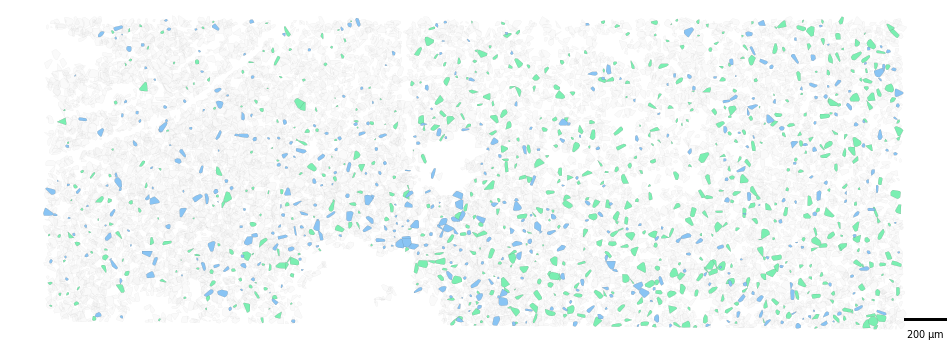

In [7]:
selected = ['preOPC-like 1', 'OPC-like 2']
sp.pl.plot_polygons(
    adata,
    'SL001B',
    cluster_key= 'm-states3',
    clusters = selected, 
    grey_clusters=grey,
    palette = palette,
    show_axis=False,
    area_min_size=10,
    alpha=1,
    figsize=(10,10),
    xlim = (7000, 11000),
    ylim = (1000, 3000), 
    save=True,
    savepath='figures/SL001B_OPC-preOPC.svg'
)

In [8]:
sadata = adata[adata.obs.Sample == 'SL001A']

INFO:root:First filter, 62058 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 13424 cells left


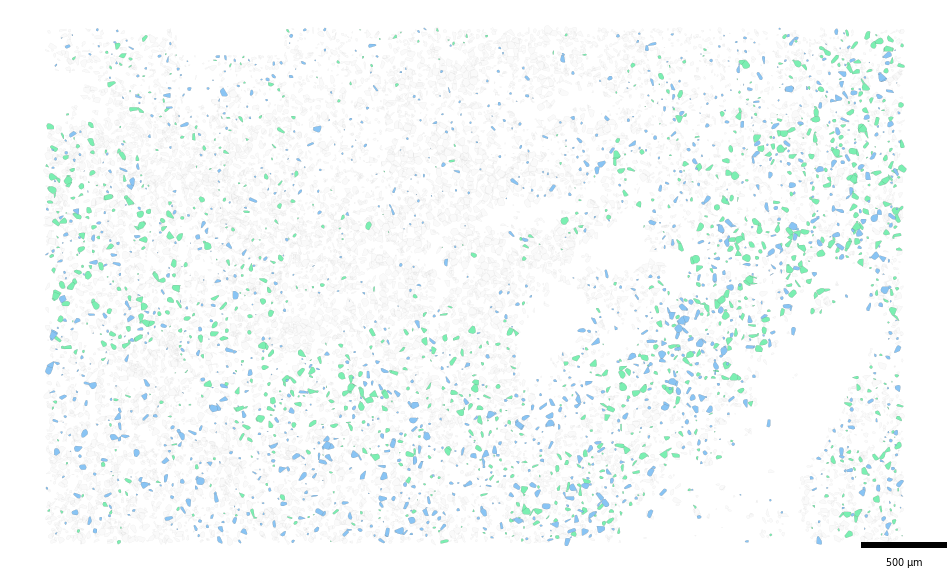

In [9]:
selected = ['preOPC-like 1', 'OPC-like 2']
sp.pl.plot_polygons(
    adata,
    'SL001A',
    cluster_key= 'm-states3',
    clusters = selected, 
    grey_clusters=grey,
    palette = palette,
    show_axis=False,
    area_min_size=1,
    alpha=1,
    #gray_color='#eeeeee',
    alpha_gray=0.25,
    figsize=(10,10),
    xlim = (2500,7500),
    ylim = (3000,6000),
    
    save=True,
    savepath='figures/SL001A_OPC-preOPC.svg'
)

In [ ]:
selected = ['preOPC-like 1', 'OPC-like 2']
sp.pl.plot_polygons(
    adata,
    'SL038',
    cluster_key= 'm-states3',
    clusters = selected, 
    xlim=(1000,3000),
    ylim=(1000,3000),
    grey_clusters=grey,
    palette = palette,
    show_axis=False,
    area_min_size=1,
    alpha=1,
    #gray_color='#eeeeee',
    alpha_gray=0.25,
    figsize=(10,10),

    
    save=True,
    savepath='figures/SL038_OPC-preOPC.svg'
)

INFO:root:First filter, 154418 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 15795 cells left


INFO:root:First filter, 62033 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 12603 cells left


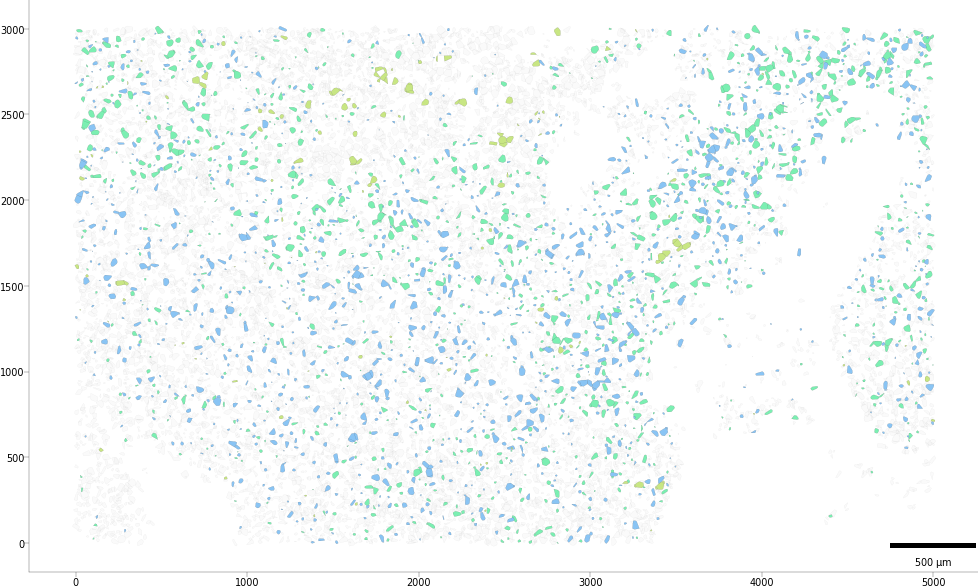

In [11]:
selected = ['preOPC-like 1','OPC-like 2']
sp.pl.plot_polygons(
    adata,
    'SL001A',
    cluster_key= 'm-states3',
    clusters = selected, 
    grey_clusters=grey,
    palette = palette,
    show_axis=True,
    area_min_size=10,
    alpha=1,
    xlim=(2500, 7500),
    ylim = (2000,5000),
    figsize=(10,10),
    #save=True,
    #savepath='figures/SL001A_OPC-preOPC.svg'
)

INFO:root:First filter, 62033 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 12603 cells left


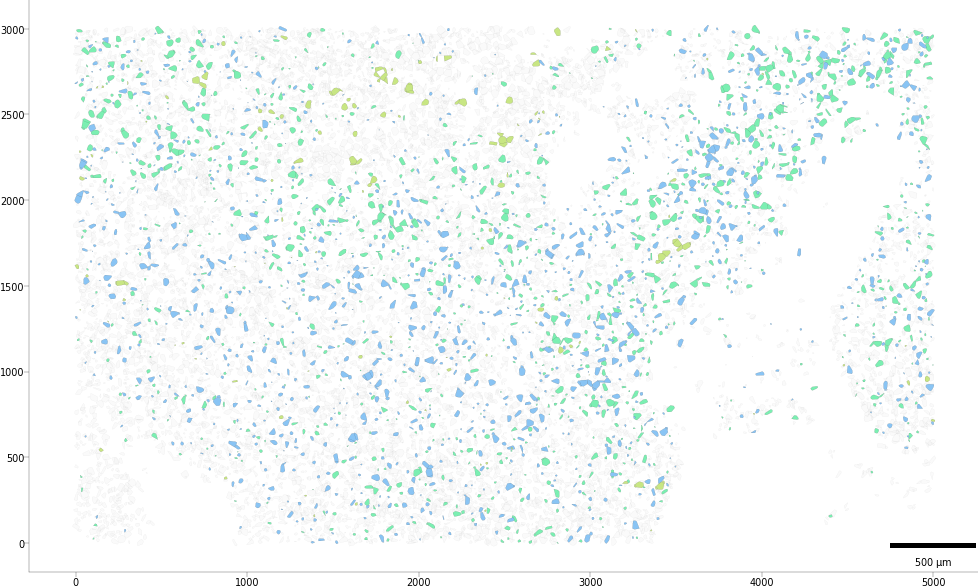

In [12]:
selected = ['preOPC-like 1','OPC-like 2','Endothelial']
sp.pl.plot_polygons(
    adata,
    'SL001A',
    cluster_key= 'm-states3',
    clusters = selected, 
    grey_clusters=grey,
    palette = palette,
    show_axis=True,
    area_min_size=10,
    alpha=1,
    xlim=(2500, 7500),
    ylim = (2000,5000),
    figsize=(10,10),
    #save=True,
    #savepath='figures/SL001A_OPC-preOPC.svg'
)

In [65]:
filterCRYAB = adata[:,'CRYAB'].X > 1
filterS100B = adata[:,'S100B'].X > 1
filterAQP4 = adata[:,'AQP4'].X > 1
filterCluster = adata.obs['m-states3']Temp == 'AC-like 3'
allfilters = (filterAQP4.flatten() | filterCRYAB.flatten() | filterS100B.flatten()) 
allfilters = allfilters & filterCluster.values.flatten()

In [71]:
adata.obs['ClustersTemp'] = pd.Categorical(
    [
        'unknown' if cn == 'AC-like 3' and f == False else cn for cn, f in zip(adata.obs['m-states3']Temp, allfilters)
    ]
)


# SL035B

INFO:root:First filter, 445307 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 76141 cells left


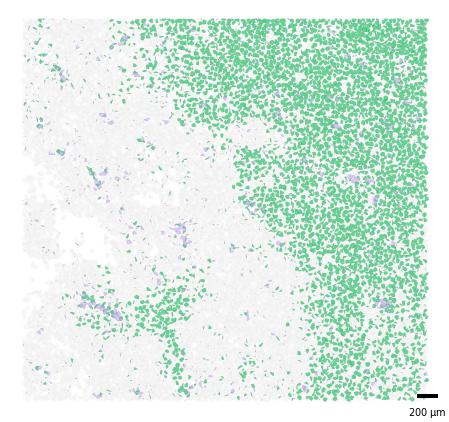

In [14]:
selected = ['AC-like 3','Mural', 'Endothelial']
sp.pl.plot_polygons(
    adata,
    'SL035B',
    cluster_key= 'm-states3',
    xlim=(11000,15000),
    ylim=(5000,9000),
    clusters = selected, 
    grey_clusters=grey,
    palette = palette,
    area_min_size=10,
    alpha_gray=0.25,
    linewidth_gray=0,
    figsize=(5,5),
    save=True,
    #show_axis=True,
    savepath='figures/SL0035B_AC-Mural.svg'
)

INFO:root:First filter, 449773 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 4995 cells left


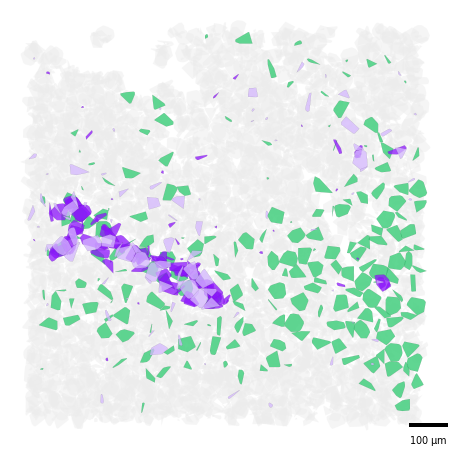

In [27]:
selected = ['AC-like 3' ,'Mural cell','Endothelial']
sp.pl.plot_polygons(
    adata,
    'SL035B',
    cluster_key= 'm-states3',
    xlim=(11500,12500),
    ylim=(5500,6500),
    clusters = selected, 
    grey_clusters=grey,
    alpha_gray=0.5,
    linewidth_gray=0,
    palette = palette,
    area_min_size=10,
    figsize=(5,5),
    save=True,
    show_axis=False,
    savepath='figures/SL0035B_AC-Muralzoom.svg'
)

INFO:root:First filter, 87290 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2544 cells left


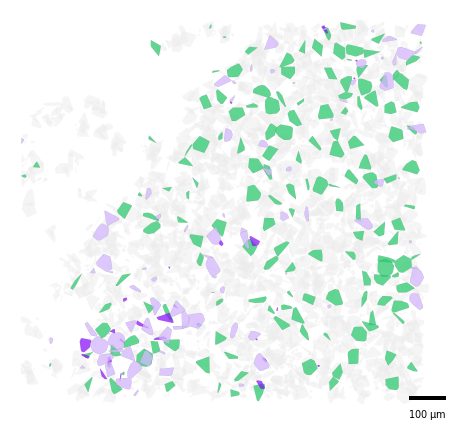

In [34]:
selected = ['AC-like 3' ,'Mural cell','Endothelial']
sp.pl.plot_polygons(
    adata,
    'SL034',
    cluster_key= 'm-states3',
    xlim=(3500,5000),
    ylim=(3000,4000),
    clusters = selected, 
    grey_clusters=grey,
    alpha_gray=0.5,
    linewidth_gray=0,
    palette = palette,
    area_min_size=10,
    figsize=(5,5),
    save=True,
    show_axis=False,
    savepath='figures/SL034_AC-Muralzoom.svg'
)

INFO:root:First filter, 263631 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 7262 cells left


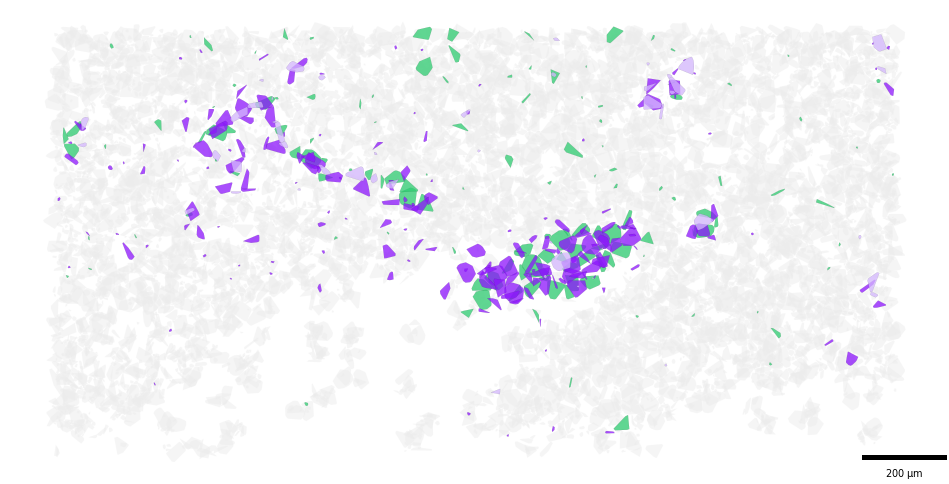

In [25]:
selected = ['AC-like 3' ,'Mural cell','Endothelial']
sp.pl.plot_polygons(
    adata,
    'SL046C',
    cluster_key= 'm-states3',
    xlim=(8000,10000),
    ylim=(1600,2600),
    clusters = selected, 
    grey_clusters=grey,
    alpha_gray=0.5,
    linewidth_gray=0,
    palette = palette,
    area_min_size=10,
    figsize=(10,10),
    save=True,
    show_axis=False,
    savepath='figures/SL046_AC-Muralzoom.svg'
)

INFO:root:First filter, 252364 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 4155 cells left


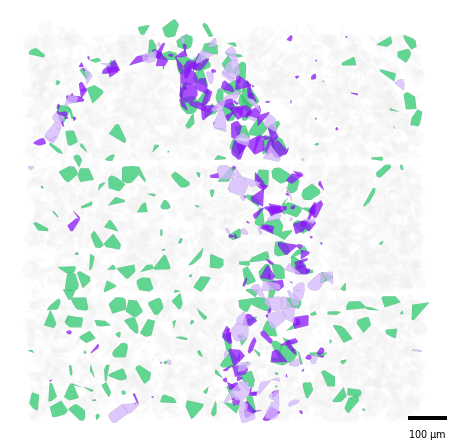

In [37]:
selected = ['AC-like 3' ,'Mural cell','Endothelial']
sp.pl.plot_polygons(
    adata,
    'SL046B',
    cluster_key= 'm-states3',
    xlim=(7500,8500),
    ylim=(6500,7500),
    clusters = selected, 
    grey_clusters=grey,
    alpha_gray=0.25,
    linewidth_gray=0,
    palette = palette,
    area_min_size=10,
    figsize=(5,5),
    save=True,
    show_axis=False,
    savepath='figures/SL046B_AC-Muralzoom.svg'
)